C:\Users\zairy\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 119892 (\N{MATHEMATICAL ITALIC SMALL G}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


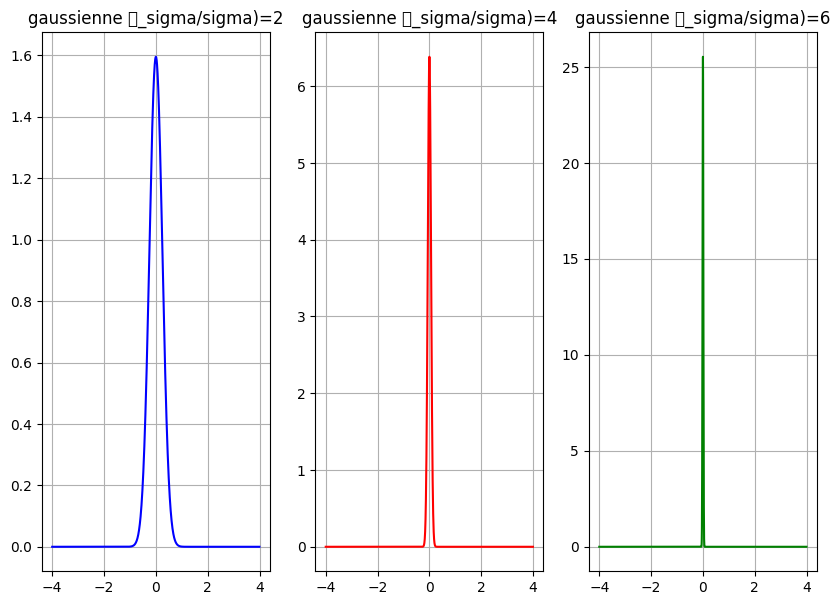

In [31]:
import matplotlib.pyplot as plt
import numpy as np
Te=0.005
t=np.arange(-4,4,Te)
def g_sigma(t, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-t**2 / (2 * sigma**2))

sg = [1 / (2**k) for k in [2, 4, 6]]
plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
plt.plot(t,g_sigma(t,sg[0]),'b',label='sigma=2')
plt.title("gaussienne 𝑔_sigma/sigma)=2")
plt.grid()
plt.subplot(1,3,2)
plt.plot(t,g_sigma(t,sg[1]),'r',label='sigma=4')
plt.title("gaussienne 𝑔_sigma/sigma)=4")
plt.grid()
plt.subplot(1,3,3)
plt.plot(t,g_sigma(t,sg[2]),'g',label='sigma=6')
plt.title("gaussienne 𝑔_sigma/sigma)=6")
plt.grid()
plt.show()

In [32]:
#Quand σ diminue, 𝑔𝜎(t) devient plus « piquée » → elle tend vers le Dirac δ(t).

c:\Users\zairy\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zairy\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


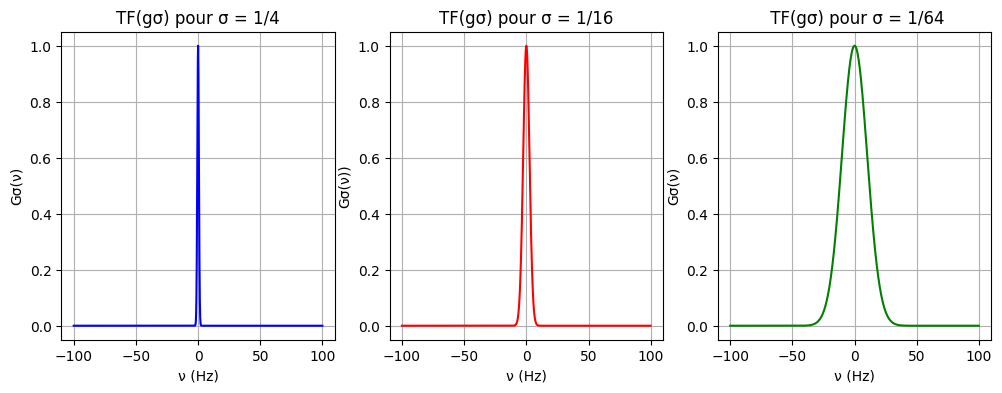

In [33]:

nu_e = 1 / Te
nu = np.arange(-nu_e / 2, nu_e / 2, 0.1)


# ---------- Transformée de Fourier ----------
def TF_g_sigma(t, sigma):
    g = g_sigma(t, sigma)
    G = []
    for n in nu:
        integrand = g * np.exp(-2j * np.pi * n * t)
        G.append(np.trapezoid(integrand, t))  
    return G



# ---------- Calcul des TF ----------
G1 = TF_g_sigma(t, sg[0])
G2 = TF_g_sigma(t, sg[1])
G3 = TF_g_sigma(t, sg[2])

# ---------- Tracé des courbes ----------
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(nu, G1, 'b')
plt.title("TF(gσ) pour σ = 1/4")
plt.xlabel("ν (Hz)")
plt.ylabel("Gσ(ν)")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(nu, G2, 'r')
plt.title("TF(gσ) pour σ = 1/16")
plt.xlabel("ν (Hz)")
plt.ylabel("Gσ(ν))")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(nu,G3, 'g')
plt.title(" TF(gσ) pour σ = 1/64")
plt.xlabel("ν (Hz)")
plt.ylabel("Gσ(ν)")
plt.grid(True)


plt.show()



In [34]:
#Sa transformée de Fourier 𝐺𝜎(𝜈) s’élargit : c’est la dualité temps/fréquence.

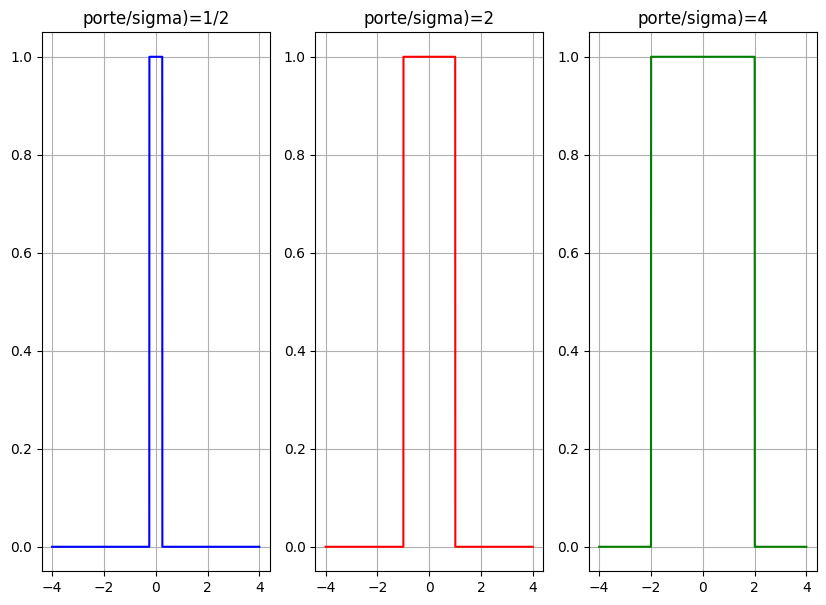

In [35]:


# ---------- Fonction porte ----------
def porte(t):
   
    y = (abs(t) <= 0.5)
    return np.float16(y)

# ---------- Paramètres ----------
nu_e = 1 / Te
nu = np.arange(-nu_e / 2, nu_e / 2, 0.1)

# ---------- Transformée de Fourier avec np.trapezoid ----------
def TF_porte1(t):
    f = porte(t*(2))
    F = []
    for n in nu:
        integrand = f * np.exp(-2j * np.pi * n * t)
        F.append(np.trapezoid(integrand, t))
    return np.array(F)
def TF_porte2(t):
    f = porte(t*(1/2))
    F = []
    for n in nu:
        integrand = f * np.exp(-2j * np.pi * n * t)
        F.append(np.trapezoid(integrand, t))
    return np.array(F)
def TF_porte3(t):
    f = porte(t*(1/4))
    F = []
    for n in nu:
        integrand = f * np.exp(-2j * np.pi * n * t)
        F.append(np.trapezoid(integrand, t))
    return np.array(F)



# ---------- Calcul des TF ----------
F1 = TF_porte1(t)
F2 = TF_porte2(t)
F3 = TF_porte3(t)

# ---------- Tracé des fonctions porte ----------
plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
plt.plot(t,porte(2*t),'b')
plt.title("porte/sigma)=1/2")
plt.grid()
plt.subplot(1,3,2)
plt.plot(t,porte(0.5*t),'r')
plt.title("porte/sigma)=2")
plt.grid()
plt.subplot(1,3,3)
plt.plot(t,porte(0.25*t),'g')
plt.title("porte/sigma)=4")
plt.grid()
plt.show()


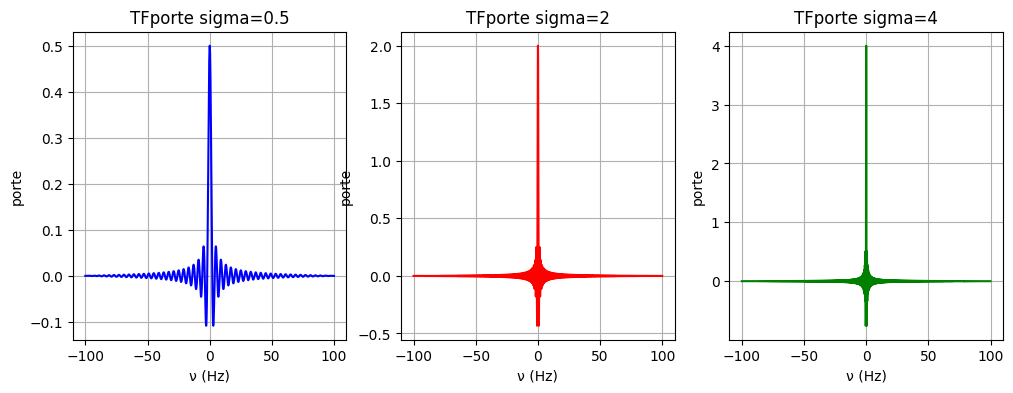

In [36]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(nu, F1, 'b')
plt.title("TFporte sigma=0.5")
plt.xlabel("ν (Hz)")
plt.ylabel("porte")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(nu, F2, 'r')
plt.title("TFporte sigma=2")
plt.xlabel("ν (Hz)")
plt.ylabel("porte")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(nu,F3, 'g')
plt.title("TFporte sigma=4")
plt.xlabel("ν (Hz)")
plt.ylabel("porte")
plt.grid(True)


plt.show()

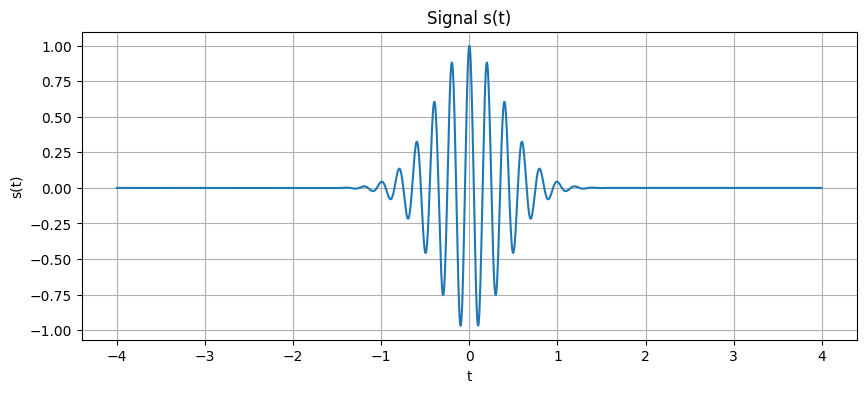

In [37]:
nu0 = 5  # Hz
s = np.exp(-np.pi * t**2) * np.cos(2 * np.pi * nu0 * t)

plt.figure(figsize=(10, 4))
plt.plot(t, s)
plt.title("Signal s(t)")
plt.xlabel("t")
plt.ylabel("s(t)")
plt.grid(True)
plt.show()

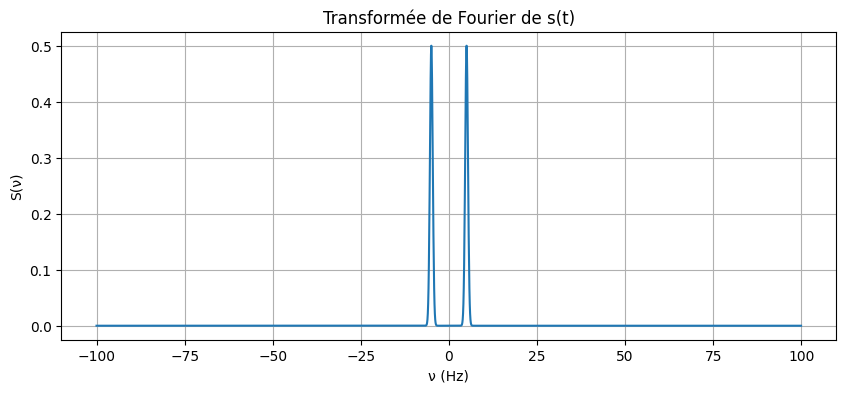

In [38]:
S = []
for n in nu:
    integrand = s * np.exp(-2j * np.pi * n * t)
    S.append(np.trapezoid(integrand, t))
S = np.array(S)

plt.figure(figsize=(10, 4))
plt.plot(nu, S)
plt.title("Transformée de Fourier de s(t)")
plt.xlabel("ν (Hz)")
plt.ylabel("S(ν)")
plt.grid(True)
plt.show()

C:\Users\zairy\AppData\Local\Temp\ipykernel_11184\3054190281.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\zairy\AppData\Local\Temp\ipykernel_11184\3054190281.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\zairy\AppData\Local\Temp\ipykernel_11184\3054190281.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


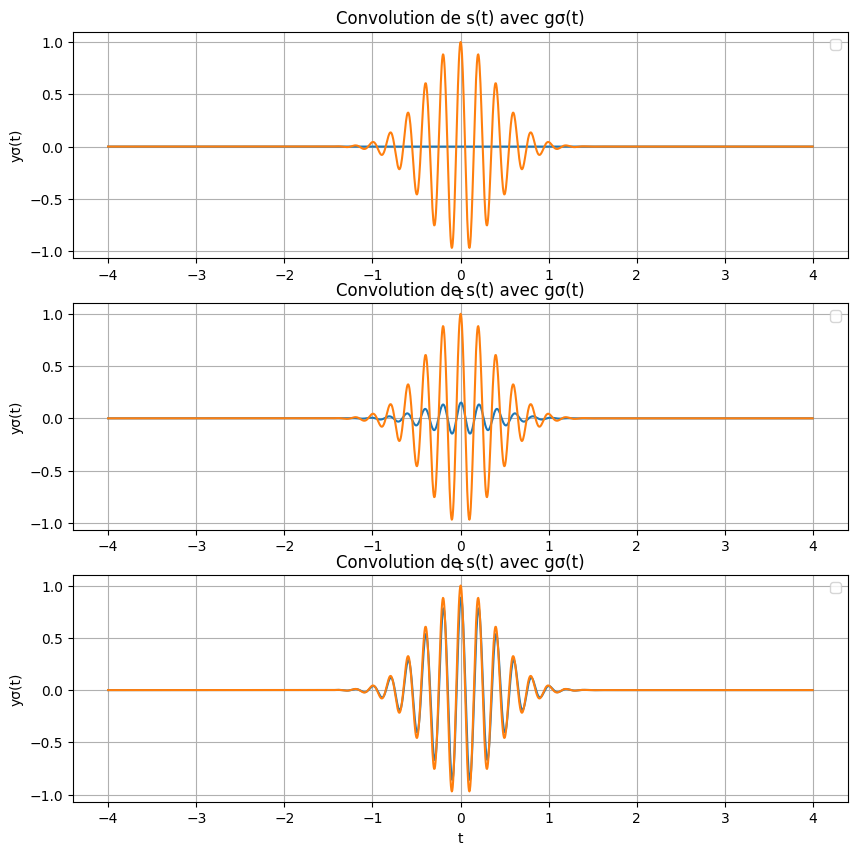

In [39]:
plt.figure(figsize=(10, 10))


y = np.convolve(s, g_sigma(t,sg[0]), mode='same') * Te
yy = np.convolve(s, g_sigma(t,sg[1]), mode='same') * Te
yyy= np.convolve(s, g_sigma(t,sg[2]), mode='same')  * Te
plt.subplot(3,1,1)
plt.plot(t, y)
plt.plot(t, s)
plt.title("Convolution de s(t) avec gσ(t)")
plt.xlabel("t")
plt.ylabel("yσ(t)")
plt.legend()
plt.grid(True)
plt.subplot(3,1,2)
plt.plot(t, yy)
plt.plot(t, s)
plt.title("Convolution de s(t) avec gσ(t)")
plt.xlabel("t")
plt.ylabel("yσ(t)")
plt.legend()
plt.grid(True)
plt.subplot(3,1,3)
plt.plot(t, yyy)
plt.plot(t, s)
plt.title("Convolution de s(t) avec gσ(t)")
plt.xlabel("t")
plt.ylabel("yσ(t)")
plt.legend()
plt.grid(True)

plt.show()

C:\Users\zairy\AppData\Local\Temp\ipykernel_11184\2890589674.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\zairy\AppData\Local\Temp\ipykernel_11184\2890589674.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\zairy\AppData\Local\Temp\ipykernel_11184\2890589674.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


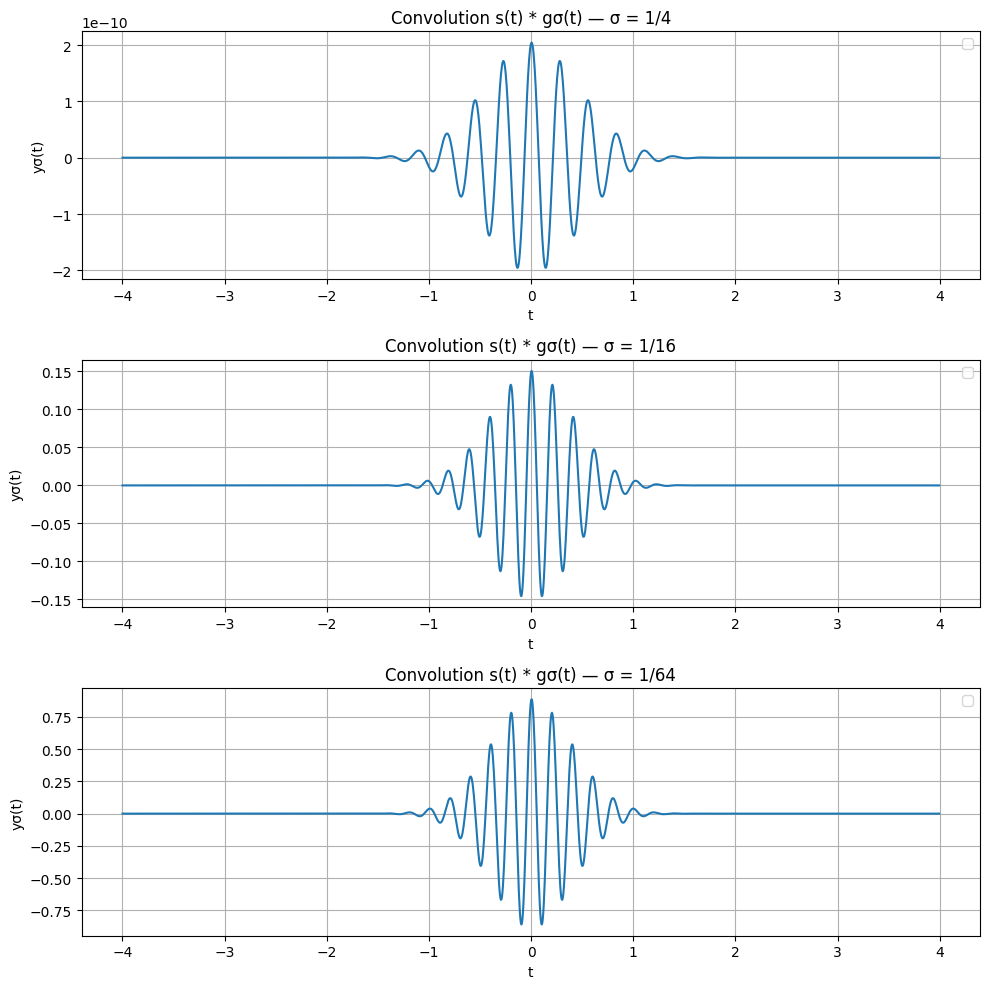

In [40]:



# ---------- Convolutions ----------
y1 = np.convolve(s, g_sigma(t, sg[0]), mode='same') * Te
y2 = np.convolve(s, g_sigma(t, sg[1]), mode='same') * Te
y3 = np.convolve(s, g_sigma(t, sg[2]), mode='same') * Te

# ---------- Affichage ----------
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)

plt.plot(t, y1)
plt.title("Convolution s(t) * gσ(t) — σ = 1/4")
plt.xlabel("t")
plt.ylabel("yσ(t)")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, y2)
plt.title("Convolution s(t) * gσ(t) — σ = 1/16")
plt.xlabel("t")
plt.ylabel("yσ(t)")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, y3)
plt.title("Convolution s(t) * gσ(t) — σ = 1/64")
plt.xlabel("t")
plt.ylabel("yσ(t)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
